In [1]:
import h5py as h5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm


In [2]:
datapath = "Herwig_qcd_features.h5"
df = pd.read_hdf(datapath)

In [3]:
df

,pxj1,pyj1,pzj1,mj1,tau1j1,tau2j1,tau3j1,pxj2,pyj2,pzj2,mj2,tau1j2,tau2j2,tau3j2
0,-1062.890015,-628.263000,1.169330,223.070007,186.315994,108.044998,68.937798,785.325012,370.963013,-111.802002,67.170799,50.092701,28.765200,15.288100
1,-561.768005,-1116.109985,-865.270020,242.136002,88.407402,20.304501,12.437700,508.622009,966.379028,-325.015015,77.530197,36.413601,31.230499,24.091101
2,-1737.829956,-749.458008,-321.303009,95.748199,30.898800,22.592400,16.777599,929.109009,955.013977,1421.810059,583.320984,342.750000,61.851898,36.460602
3,-798.586975,918.947998,2056.659912,440.657013,238.959000,144.123993,71.498199,537.398987,-838.393005,-1693.349976,144.897003,36.847801,28.074800,14.404400
4,647.491028,-1165.069946,-59.776699,51.966702,24.274799,4.958610,2.036370,-794.692993,1014.479980,-1927.390015,116.587997,41.674801,18.256599,12.612700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,-710.262024,-1026.920044,-1307.729980,796.106995,744.283020,368.661987,210.828003,692.814026,976.697998,-41.325802,32.149200,10.357700,7.979660,4.746760
999995,-268.907990,1307.540039,1420.180054,333.614014,240.792007,171.697006,130.660995,155.938995,-1274.060059,-1473.140015,124.994003,86.582901,25.811399,18.830799
999996,65.702904,-1444.400024,-1056.260010,77.524902,39.939301,23.995701,13.755400,314.462006,1388.619995,-158.914001,420.259003,295.635986,57.412300,44.277100
999997,-133.639999,1522.699951,-229.511993,632.781006,504.207001,105.698997,48.149700,29.203501,-1470.739990,-839.638977,189.417999,60.181000,42.477699,32.273899


In [4]:
def computemjj_np(event):
    px1 = event[:,0]
    py1 = event[:,1]
    pz1 = event[:,2]
    pE1 = np.sqrt(px1**2+py1**2+pz1**2+event[:,3]**2)
    
    px2 = event[:,7]
    py2 = event[:,8]
    pz2 = event[:,9]
    pE2 = np.sqrt(px2**2+py2**2+pz2**2+event[:,10]**2)
    
    m2 = (pE1+pE2)**2-(px1+px2)**2-(py1+py2)**2-(pz1+pz2)**2
    return np.sqrt(m2)

In [5]:
herwig_np = df.to_numpy()
mjj_herwig = computemjj_np(herwig_np)
mjj_herwig

array([2096.18175627, 2397.09079043, 3707.09535248, ..., 3028.00084892,
       3198.57333649, 3638.00693971])

In [6]:
minmass_herwig = np.array(df[['mj1','mj2']].min(axis=1))
maxmass_herwig = np.array(df[['mj1','mj2']].max(axis=1))

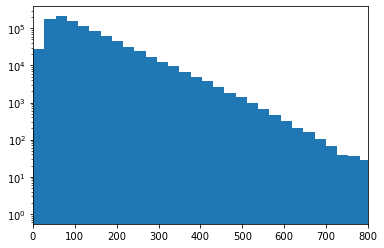

In [7]:
plt.yscale('log')
plt.xlim(0,800)
hist=plt.hist(minmass_herwig,bins=50)

(array([9.37600e+03, 6.55270e+04, 1.03325e+05, 1.13114e+05, 1.09579e+05,
        9.97220e+04, 8.84960e+04, 7.67230e+04, 6.58990e+04, 5.53940e+04,
        4.71080e+04, 3.83760e+04, 3.21630e+04, 2.53950e+04, 2.01810e+04,
        1.54280e+04, 1.14860e+04, 7.91200e+03, 5.26100e+03, 3.33200e+03,
        2.19600e+03, 1.35300e+03, 9.15000e+02, 5.60000e+02, 3.36000e+02,
        2.57000e+02, 1.97000e+02, 1.30000e+02, 7.80000e+01, 6.50000e+01,
        3.00000e+01, 2.20000e+01, 1.60000e+01, 1.80000e+01, 1.00000e+01,
        9.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 2.00000e+00,
        1.00000e+00, 1.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([  13.25669956,   52.04596498,   90.83523041,  129.62449583,
         168.41376125,  207.20302668,  245.9922921 ,  284.78155752,
         323.57082294,  362.36008837,  401.14935379,  439.93861921,
         478.72788464,  517.51715006,  556.30641548,  595.095680

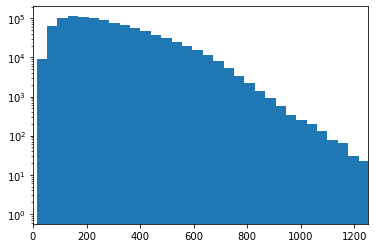

In [8]:
plt.yscale('log')
plt.xlim(0,1250)
plt.hist(maxmass_herwig,bins=50)

In [9]:
num=500000

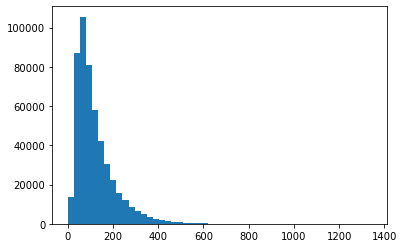

In [10]:
hist=plt.hist(minmass_herwig[0:num],bins=50)

In [11]:
B1=minmass_herwig[0:num].reshape(-1, 1)

In [12]:
B2=maxmass_herwig[0:num].reshape(-1, 1)

In [49]:
from sklearn.preprocessing import MinMaxScaler

scaler1 = MinMaxScaler((-1,1)).fit(B1)
B1 = scaler1.transform(B1)

scaler2 = MinMaxScaler((-1,1)).fit(B2)
B2 = scaler2.transform(B2)


In [46]:
scaler

MinMaxScaler(feature_range=(-1, 1))

In [35]:
B2D = np.digitize(maxmass_herwig[0:num], 100)


ValueError: object of too small depth for desired array

In [50]:
combined = np.column_stack((B1, B2))

In [51]:
combined

array([[-0.90012664, -0.78363776],
       [-0.8847237 , -0.76397666],
       [-0.85763615, -0.41214222],
       ...,
       [-0.77109251, -0.73952659],
       [-0.63649337, -0.64079205],
       [-0.89858031, -0.88450898]])

Iterations: 0	 Discriminator loss: 1.2753	 Generator loss: 0.7051


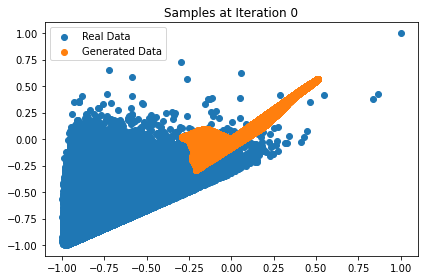

Iterations: 1	 Discriminator loss: 1.2661	 Generator loss: 0.7070
Iterations: 2	 Discriminator loss: 1.2524	 Generator loss: 0.7102
Iterations: 3	 Discriminator loss: 1.2329	 Generator loss: 0.7141
Iterations: 4	 Discriminator loss: 1.2068	 Generator loss: 0.7178
Iterations: 5	 Discriminator loss: 1.1774	 Generator loss: 0.7171
Iterations: 6	 Discriminator loss: 1.1529	 Generator loss: 0.7113
Iterations: 7	 Discriminator loss: 1.1372	 Generator loss: 0.6984
Iterations: 8	 Discriminator loss: 1.1374	 Generator loss: 0.6774
Iterations: 9	 Discriminator loss: 1.1631	 Generator loss: 0.6526
Iterations: 10	 Discriminator loss: 1.2128	 Generator loss: 0.6365
Iterations: 11	 Discriminator loss: 1.2733	 Generator loss: 0.6427
Iterations: 12	 Discriminator loss: 1.3369	 Generator loss: 0.6633
Iterations: 13	 Discriminator loss: 1.4045	 Generator loss: 0.6734
Iterations: 14	 Discriminator loss: 1.4542	 Generator loss: 0.6843
Iterations: 15	 Discriminator loss: 1.4615	 Generator loss: 0.7051
Iter

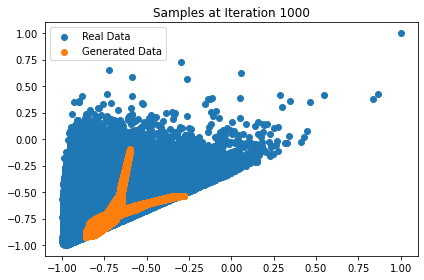

Iterations: 1001	 Discriminator loss: 1.1206	 Generator loss: 0.3980
Iterations: 1002	 Discriminator loss: 1.2311	 Generator loss: 0.4622
Iterations: 1003	 Discriminator loss: 1.2384	 Generator loss: 0.4978
Iterations: 1004	 Discriminator loss: 1.2070	 Generator loss: 0.3666
Iterations: 1005	 Discriminator loss: 1.0650	 Generator loss: 0.3421
Iterations: 1006	 Discriminator loss: 1.2518	 Generator loss: 0.4859
Iterations: 1007	 Discriminator loss: 1.2162	 Generator loss: 0.4609
Iterations: 1008	 Discriminator loss: 1.1854	 Generator loss: 0.3717
Iterations: 1009	 Discriminator loss: 1.1236	 Generator loss: 0.4022
Iterations: 1010	 Discriminator loss: 1.2256	 Generator loss: 0.4527
Iterations: 1011	 Discriminator loss: 1.2350	 Generator loss: 0.4969
Iterations: 1012	 Discriminator loss: 1.2052	 Generator loss: 0.3675
Iterations: 1013	 Discriminator loss: 1.0650	 Generator loss: 0.3401
Iterations: 1014	 Discriminator loss: 1.2418	 Generator loss: 0.4706
Iterations: 1015	 Discriminator lo

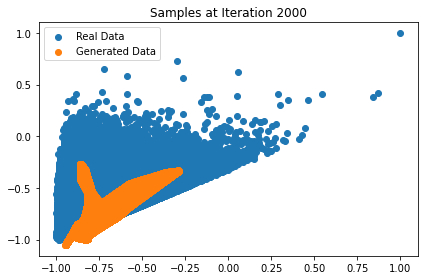

Iterations: 2001	 Discriminator loss: 1.2112	 Generator loss: 0.4190
Iterations: 2002	 Discriminator loss: 1.0820	 Generator loss: 0.2506
Iterations: 2003	 Discriminator loss: 1.2113	 Generator loss: 0.4184
Iterations: 2004	 Discriminator loss: 1.0800	 Generator loss: 0.2515
Iterations: 2005	 Discriminator loss: 1.2097	 Generator loss: 0.4165
Iterations: 2006	 Discriminator loss: 1.0791	 Generator loss: 0.2515
Iterations: 2007	 Discriminator loss: 1.2114	 Generator loss: 0.4178
Iterations: 2008	 Discriminator loss: 1.0791	 Generator loss: 0.2492
Iterations: 2009	 Discriminator loss: 1.2109	 Generator loss: 0.4173
Iterations: 2010	 Discriminator loss: 1.0770	 Generator loss: 0.2507
Iterations: 2011	 Discriminator loss: 1.2105	 Generator loss: 0.4159
Iterations: 2012	 Discriminator loss: 1.0792	 Generator loss: 0.2504
Iterations: 2013	 Discriminator loss: 1.2105	 Generator loss: 0.4156
Iterations: 2014	 Discriminator loss: 1.0795	 Generator loss: 0.2504
Iterations: 2015	 Discriminator lo

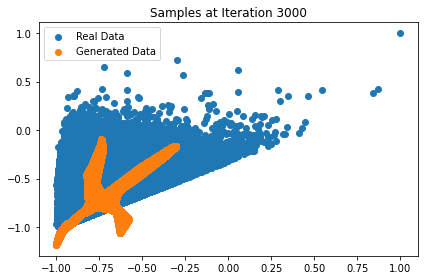

Iterations: 3001	 Discriminator loss: 1.2005	 Generator loss: 0.3872
Iterations: 3002	 Discriminator loss: 1.1315	 Generator loss: 0.2321
Iterations: 3003	 Discriminator loss: 1.2042	 Generator loss: 0.4193
Iterations: 3004	 Discriminator loss: 1.0940	 Generator loss: 0.2050
Iterations: 3005	 Discriminator loss: 1.0634	 Generator loss: 0.2882
Iterations: 3006	 Discriminator loss: 1.1581	 Generator loss: 0.3249
Iterations: 3007	 Discriminator loss: 1.1992	 Generator loss: 0.3850
Iterations: 3008	 Discriminator loss: 1.1297	 Generator loss: 0.2335
Iterations: 3009	 Discriminator loss: 1.2026	 Generator loss: 0.4188
Iterations: 3010	 Discriminator loss: 1.0923	 Generator loss: 0.2040
Iterations: 3011	 Discriminator loss: 1.0615	 Generator loss: 0.2859
Iterations: 3012	 Discriminator loss: 1.1670	 Generator loss: 0.3304
Iterations: 3013	 Discriminator loss: 1.1997	 Generator loss: 0.3835
Iterations: 3014	 Discriminator loss: 1.1240	 Generator loss: 0.2328
Iterations: 3015	 Discriminator lo

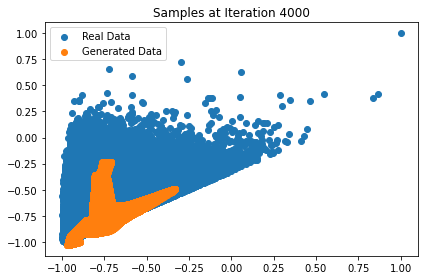

Iterations: 4001	 Discriminator loss: 1.1984	 Generator loss: 0.4202
Iterations: 4002	 Discriminator loss: 1.0918	 Generator loss: 0.1501
Iterations: 4003	 Discriminator loss: 0.9869	 Generator loss: 0.2714
Iterations: 4004	 Discriminator loss: 1.1627	 Generator loss: 0.3605
Iterations: 4005	 Discriminator loss: 1.2338	 Generator loss: 0.4462
Iterations: 4006	 Discriminator loss: 1.1929	 Generator loss: 0.2696
Iterations: 4007	 Discriminator loss: 1.1845	 Generator loss: 0.3956
Iterations: 4008	 Discriminator loss: 1.0885	 Generator loss: 0.2100
Iterations: 4009	 Discriminator loss: 0.9766	 Generator loss: 0.2731
Iterations: 4010	 Discriminator loss: 1.1434	 Generator loss: 0.3361
Iterations: 4011	 Discriminator loss: 1.2274	 Generator loss: 0.4445
Iterations: 4012	 Discriminator loss: 1.2043	 Generator loss: 0.2797
Iterations: 4013	 Discriminator loss: 1.1939	 Generator loss: 0.4131
Iterations: 4014	 Discriminator loss: 1.0880	 Generator loss: 0.1568
Iterations: 4015	 Discriminator lo

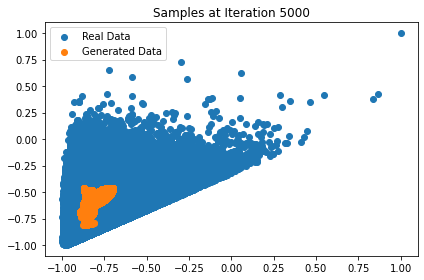

Iterations: 5001	 Discriminator loss: 1.3983	 Generator loss: 0.5773
Iterations: 5002	 Discriminator loss: 1.2890	 Generator loss: 0.4877
Iterations: 5003	 Discriminator loss: 1.3887	 Generator loss: 0.6613
Iterations: 5004	 Discriminator loss: 1.3898	 Generator loss: 0.6680
Iterations: 5005	 Discriminator loss: 1.3439	 Generator loss: 0.5797
Iterations: 5006	 Discriminator loss: 1.3836	 Generator loss: 0.6315
Iterations: 5007	 Discriminator loss: 1.3821	 Generator loss: 0.6178
Iterations: 5008	 Discriminator loss: 1.3821	 Generator loss: 0.6434
Iterations: 5009	 Discriminator loss: 1.3825	 Generator loss: 0.6347
Iterations: 5010	 Discriminator loss: 1.3746	 Generator loss: 0.5431
Iterations: 5011	 Discriminator loss: 1.1784	 Generator loss: 0.5304
Iterations: 5012	 Discriminator loss: 1.3515	 Generator loss: 0.6462
Iterations: 5013	 Discriminator loss: 1.4010	 Generator loss: 0.5840
Iterations: 5014	 Discriminator loss: 1.3615	 Generator loss: 0.6081
Iterations: 5015	 Discriminator lo

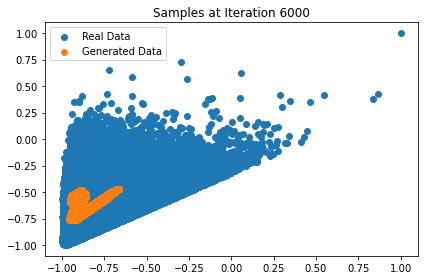

Iterations: 6001	 Discriminator loss: 1.2626	 Generator loss: 0.3183
Iterations: 6002	 Discriminator loss: 1.2430	 Generator loss: 0.4633
Iterations: 6003	 Discriminator loss: 1.3050	 Generator loss: 0.4950
Iterations: 6004	 Discriminator loss: 1.2209	 Generator loss: 0.3737
Iterations: 6005	 Discriminator loss: 1.0290	 Generator loss: 0.2405
Iterations: 6006	 Discriminator loss: 1.2467	 Generator loss: 0.4594
Iterations: 6007	 Discriminator loss: 1.2997	 Generator loss: 0.4758
Iterations: 6008	 Discriminator loss: 1.2269	 Generator loss: 0.3846
Iterations: 6009	 Discriminator loss: 1.1230	 Generator loss: 0.3405
Iterations: 6010	 Discriminator loss: 1.2307	 Generator loss: 0.3796
Iterations: 6011	 Discriminator loss: 1.1876	 Generator loss: 0.2653
Iterations: 6012	 Discriminator loss: 1.2369	 Generator loss: 0.4527
Iterations: 6013	 Discriminator loss: 1.3092	 Generator loss: 0.5023
Iterations: 6014	 Discriminator loss: 1.2082	 Generator loss: 0.3602
Iterations: 6015	 Discriminator lo

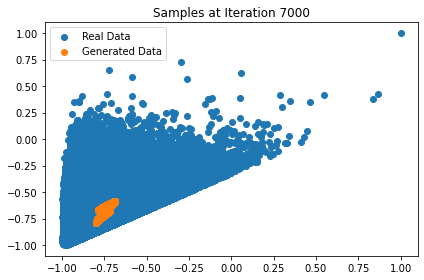

Iterations: 7001	 Discriminator loss: 1.2633	 Generator loss: 0.4920
Iterations: 7002	 Discriminator loss: 1.3537	 Generator loss: 0.6667
Iterations: 7003	 Discriminator loss: 1.1654	 Generator loss: 0.4441
Iterations: 7004	 Discriminator loss: 1.3752	 Generator loss: 0.7025
Iterations: 7005	 Discriminator loss: 1.3973	 Generator loss: 0.6370
Iterations: 7006	 Discriminator loss: 1.3724	 Generator loss: 0.5508
Iterations: 7007	 Discriminator loss: 1.3663	 Generator loss: 0.6213
Iterations: 7008	 Discriminator loss: 1.0147	 Generator loss: 0.3856
Iterations: 7009	 Discriminator loss: 1.4026	 Generator loss: 0.7051
Iterations: 7010	 Discriminator loss: 1.4077	 Generator loss: 0.6849
Iterations: 7011	 Discriminator loss: 1.3352	 Generator loss: 0.5965
Iterations: 7012	 Discriminator loss: 1.4084	 Generator loss: 0.6959
Iterations: 7013	 Discriminator loss: 1.3617	 Generator loss: 0.6415
Iterations: 7014	 Discriminator loss: 1.3826	 Generator loss: 0.6198
Iterations: 7015	 Discriminator lo

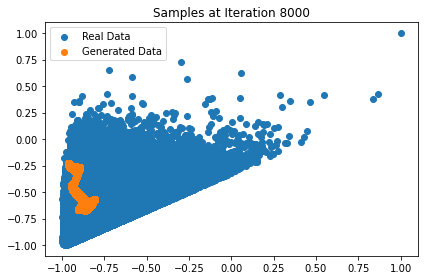

Iterations: 8001	 Discriminator loss: 1.3786	 Generator loss: 0.6565
Iterations: 8002	 Discriminator loss: 1.4036	 Generator loss: 0.6129
Iterations: 8003	 Discriminator loss: 1.3661	 Generator loss: 0.6554
Iterations: 8004	 Discriminator loss: 1.3708	 Generator loss: 0.7008
Iterations: 8005	 Discriminator loss: 1.3713	 Generator loss: 0.7020
Iterations: 8006	 Discriminator loss: 1.3352	 Generator loss: 0.4872
Iterations: 8007	 Discriminator loss: 1.0297	 Generator loss: 0.3923
Iterations: 8008	 Discriminator loss: 1.4081	 Generator loss: 0.7474
Iterations: 8009	 Discriminator loss: 1.3967	 Generator loss: 0.6998
Iterations: 8010	 Discriminator loss: 1.3325	 Generator loss: 0.5989
Iterations: 8011	 Discriminator loss: 1.3998	 Generator loss: 0.6714
Iterations: 8012	 Discriminator loss: 1.1815	 Generator loss: 0.4667
Iterations: 8013	 Discriminator loss: 1.3573	 Generator loss: 0.5890
Iterations: 8014	 Discriminator loss: 1.0706	 Generator loss: 0.3896
Iterations: 8015	 Discriminator lo

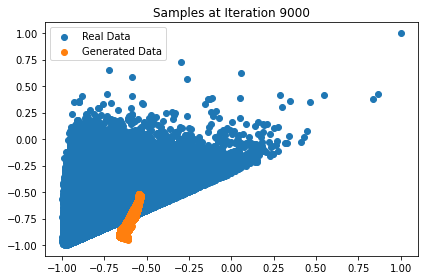

Iterations: 9001	 Discriminator loss: 1.0120	 Generator loss: 0.3782
Iterations: 9002	 Discriminator loss: 1.3986	 Generator loss: 0.7274
Iterations: 9003	 Discriminator loss: 1.4265	 Generator loss: 0.7908
Iterations: 9004	 Discriminator loss: 1.1940	 Generator loss: 0.4350
Iterations: 9005	 Discriminator loss: 1.3570	 Generator loss: 0.6999
Iterations: 9006	 Discriminator loss: 1.2901	 Generator loss: 0.3989
Iterations: 9007	 Discriminator loss: 1.1832	 Generator loss: 0.4902
Iterations: 9008	 Discriminator loss: 1.3476	 Generator loss: 0.7775
Iterations: 9009	 Discriminator loss: 1.2936	 Generator loss: 0.6071
Iterations: 9010	 Discriminator loss: 1.2271	 Generator loss: 0.4775
Iterations: 9011	 Discriminator loss: 1.4046	 Generator loss: 0.6435
Iterations: 9012	 Discriminator loss: 1.1610	 Generator loss: 0.8017
Iterations: 9013	 Discriminator loss: 0.8259	 Generator loss: 0.1736
Iterations: 9014	 Discriminator loss: 1.4819	 Generator loss: 0.7036
Iterations: 9015	 Discriminator lo

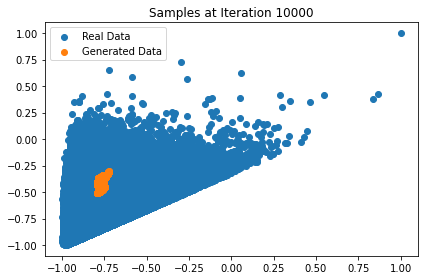

In [65]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
tf.reset_default_graph()

import matplotlib.pyplot as plt


def get_y(x):
    return 10 + x*x



def sample_Z(m, n):
    return np.random.uniform(-1., 1., size=[m, n])

def generator(Z,hsize=[16, 16],reuse=False):
    with tf.variable_scope("GAN/Generator",reuse=reuse):
        h1 = tf.layers.dense(Z,hsize[0],activation=tf.nn.leaky_relu)
        h2 = tf.layers.dense(h1,hsize[1],activation=tf.nn.leaky_relu)
        out = tf.layers.dense(h2,2)

    return out

def discriminator(X,hsize=[16, 16],reuse=False):
    with tf.variable_scope("GAN/Discriminator",reuse=reuse):
        h1 = tf.layers.dense(X,hsize[0],activation=tf.nn.leaky_relu)
        h2 = tf.layers.dense(h1,hsize[1],activation=tf.nn.leaky_relu)
        h3 = tf.layers.dense(h2,2)
        out = tf.layers.dense(h3,1)

    return out, h3


X = tf.placeholder(tf.float32,[None,2])
Z = tf.placeholder(tf.float32,[None,2])

G_sample = generator(Z)
r_logits, r_rep = discriminator(X)
f_logits, g_rep = discriminator(G_sample,reuse=True)

disc_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=r_logits,labels=tf.ones_like(r_logits)) + tf.nn.sigmoid_cross_entropy_with_logits(logits=f_logits,labels=tf.zeros_like(f_logits)))
gen_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=f_logits,labels=tf.ones_like(f_logits)))

gen_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="GAN/Generator")
disc_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="GAN/Discriminator")

gen_step = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(gen_loss,var_list = gen_vars) # G Train step
disc_step = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(disc_loss,var_list = disc_vars) # D Train step



# sess = tf.Session(config=config)
sess = tf.Session()
tf.global_variables_initializer().run(session=sess)

batch_size = num
nd_steps = 10
ng_steps = 10

x_plot = combined

f = open('loss_logs.csv','w')
f.write('Iteration,Discriminator Loss,Generator Loss\n')

for i in range(10001):
    X_batch = combined
    Z_batch = sample_Z(batch_size, 2)

    for _ in range(nd_steps):
        _, dloss = sess.run([disc_step, disc_loss], feed_dict={X: X_batch, Z: Z_batch})
    rrep_dstep, grep_dstep = sess.run([r_rep, g_rep], feed_dict={X: X_batch, Z: Z_batch})

    for _ in range(ng_steps):
        _, gloss = sess.run([gen_step, gen_loss], feed_dict={Z: Z_batch})

    rrep_gstep, grep_gstep = sess.run([r_rep, g_rep], feed_dict={X: X_batch, Z: Z_batch})

    print ("Iterations: %d\t Discriminator loss: %.4f\t Generator loss: %.4f"%(i,dloss,gloss))
    if i%10 == 0:
        f.write("%d,%f,%f\n"%(i,dloss,gloss))
    if i%1000 == 0:
        plt.figure()
        g_plot = sess.run(G_sample, feed_dict={Z: Z_batch})
        xax = plt.scatter(x_plot[:,0], x_plot[:,1])
        gax = plt.scatter(g_plot[:,0],g_plot[:,1])

        plt.legend((xax,gax), ("Real Data","Generated Data"))
        plt.title('Samples at Iteration %d'%i)
        plt.tight_layout()
        plt.show()

f.close()

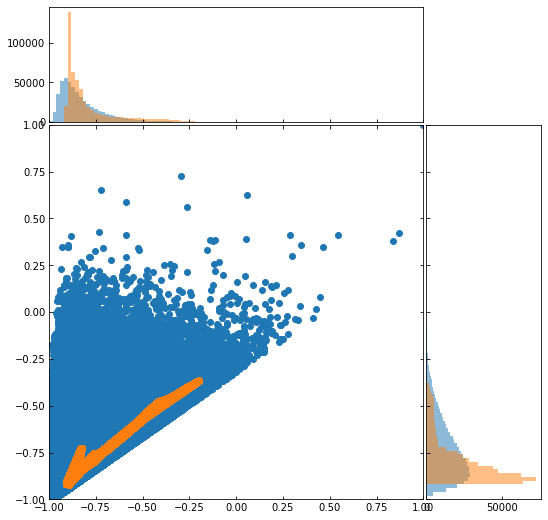

In [63]:
x=x_plot[:,0]
y=x_plot[:,1]
x1=g_plot[:,0]
y1=g_plot[:,1]
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(figsize=(8, 8))

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# the scatter plot:
ax_scatter.scatter(x, y)
ax_scatter.scatter(x1, y1)

# now determine nice limits by hand:
binwidth = 0.02
lim = 1
ax_scatter.set_xlim((-1, lim))
ax_scatter.set_ylim((-1, lim))

bins = np.arange(-1, lim + binwidth, binwidth)
ax_histx.hist(x, bins=bins,alpha = 0.5)
ax_histy.hist(y, bins=bins, orientation='horizontal',alpha = 0.5)
ax_histx.hist(x1, bins=bins,alpha = 0.5,)
ax_histy.hist(y1, bins=bins, orientation='horizontal',alpha = 0.5)

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

plt.show()

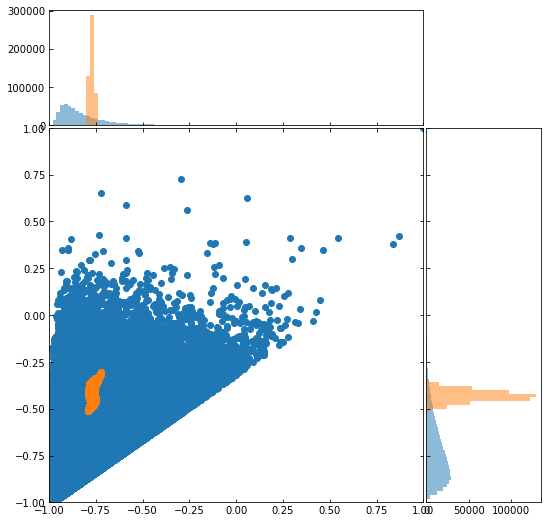

In [66]:
x=x_plot[:,0]
y=x_plot[:,1]
x1=g_plot[:,0]
y1=g_plot[:,1]
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(figsize=(8, 8))

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# the scatter plot:
ax_scatter.scatter(x, y)
ax_scatter.scatter(x1, y1)

# now determine nice limits by hand:
binwidth = 0.02
lim = 1
ax_scatter.set_xlim((-1, lim))
ax_scatter.set_ylim((-1, lim))

bins = np.arange(-1, lim + binwidth, binwidth)
ax_histx.hist(x, bins=bins,alpha = 0.5)
ax_histy.hist(y, bins=bins, orientation='horizontal',alpha = 0.5)
ax_histx.hist(x1, bins=bins,alpha = 0.5,)
ax_histy.hist(y1, bins=bins, orientation='horizontal',alpha = 0.5)

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

plt.show()